In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
from scipy import stats

# Simple Bayes Classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleBayesClassifier:
    def __init__(self, x=np.linspace(-7, 11, 100000),prior = {"w1": 0.75, "w2": 0.25},dist={"w1": (4,2), "w2": (0,2)}):  # Extended range for better visualization
        self.x = x  # Range of x values
        self.class_tag = {"happy cat": "w1", "sad cat": "w2"}
        self.prior = prior
        self.dist = dist
        self.evidence = self.likelihood(x, "w1") * self.prior["w1"] + \
                        self.likelihood(x, "w2") * self.prior["w2"]
    
    def pdf(self, z, mean=0, var=1, dist_type="gaussian"):
        """Calculate Gaussian PDF for given mean, variance, and z values."""
        if dist_type == "gaussian":
            sd = np.sqrt(var)  # Standard deviation
            pdf = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((z - mean) ** 2) / var)
        return pdf
    
    def likelihood(self, x, w="w1"):
        """Likelihood function for w1 (happy) or w2 (sad)."""
        return self.pdf(x, mean=self.dist[w][0], var=self.dist[w][1])  # Class w1: mean=4, variance=2
        
    def posterior(self, x, w="w1"):
        """Calculate the posterior probability P(w|x) for a given class."""
        likelihood = self.likelihood(x, w)
        posterior = (likelihood * self.prior[w]) / self.evidence
        return posterior
    
    def likelihood_ratio_test(self):
        """Find decision boundaries where likelihood ratio for w1 vs w2 equals 1."""
        likelihood_w1 = self.likelihood(self.x, w="w1")
        likelihood_w2 = self.likelihood(self.x, w="w2")
        likelihood_ratio = (likelihood_w1 * self.prior["w1"]) / (likelihood_w2 * self.prior["w2"])
        
        # Compute the difference from 1 to detect crossings
        diff = likelihood_ratio - 1

        # Find where the sign of diff changes
        crossing_indices = np.where(np.diff(np.sign(diff)))[0]
        
        # Return x values at crossing points
        decision_boundaries = self.x[crossing_indices]
        return decision_boundaries

    def plot_likelihood(self):
        """Plot the likelihoods P(x|w1) and P(x|w2) with decision boundaries."""
        likelihood_w1 = self.likelihood(self.x, w="w1")
        likelihood_w2 = self.likelihood(self.x, w="w2")
        decision_boundaries = self.likelihood_ratio_test()  # Get decision boundaries

        plt.figure(figsize=(3, 2))
        plt.plot(self.x, likelihood_w1, label="P(x|w1): Happy Cat", color="blue", linewidth=2)
        plt.plot(self.x, likelihood_w2, label="P(x|w2): Sad Cat", color="red", linestyle="--", linewidth=2)

        # Plot decision boundaries as vertical black lines
        for boundary in decision_boundaries:
            plt.axvline(boundary, color="black", linestyle=":", linewidth=1, label="Decision Boundary")

        plt.title("Likelihood of Food Amount")
        plt.xlabel("x (Amount of Food)")
        plt.ylabel("Likelihood (P(x|w))")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_posterior(self):
        """Plot the posterior probabilities P(w1|x) and P(w2|x) with decision boundaries."""
        posterior_w1 = self.posterior(self.x, w="w1")
        posterior_w2 = self.posterior(self.x, w="w2")
        decision_boundaries = self.likelihood_ratio_test()  # Get decision boundaries

        plt.figure(figsize=(3, 2))
        plt.plot(self.x, posterior_w1, label="P(w1|x): Happy Cat", color="blue", linewidth=2)
        plt.plot(self.x, posterior_w2, label="P(w2|x): Sad Cat", color="red", linestyle="--", linewidth=2)

        # Plot decision boundaries as vertical black lines
        for boundary in decision_boundaries:
            plt.axvline(boundary, color="black", linestyle=":", linewidth=1, label="Decision Boundary")

        plt.title("Posterior Probabilities")
        plt.xlabel("x (Amount of Food)")
        plt.ylabel("Posterior Probability P(w|x)")
        plt.legend()
        plt.grid(True)
        plt.show()



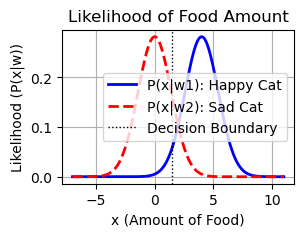

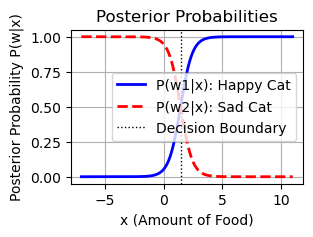

Decision Boundary Points: [1.45054451]


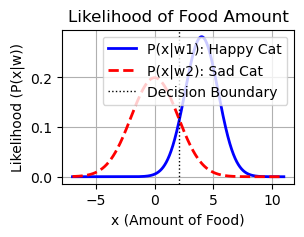

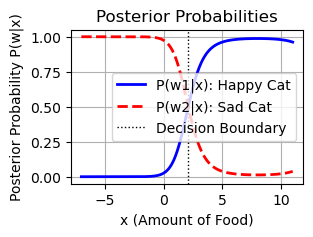

Decision Boundary Points: [2.10305103]


In [3]:
# Instantiate the classifier
model = SimpleBayesClassifier()

model.plot_likelihood()
model.plot_posterior()
decision_boundary = model.likelihood_ratio_test()
print("Decision Boundary Points:", decision_boundary)

# Instantiate the classifier
classifier2 = SimpleBayesClassifier(prior = {"w1": 0.5, "w2": 0.5},dist={"w1": (4,2), "w2": (0,4)})  # Extended range for better visualization)

classifier2.plot_likelihood()
classifier2.plot_posterior()
decision_boundary2 = classifier2.likelihood_ratio_test()
print("Decision Boundary Points:", decision_boundary2)

# Employee Attrition Prediction



In [4]:
### read CSV
df = pd.read_csv('hr-employee-attrition-with-null.csv')
# df.describe()
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [5]:
def preprocess_df(df):
    df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
    df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0

    string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                                'MaritalStatus', 'Over18', 'OverTime']

    # ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
    for col in string_categorical_col:
        # INSERT CODE HERE
        # print(pd.Categorical(df[col]).codes)
        df[col] = pd.Categorical(df[col]).codes
    # # HANDLE NULL NUMBERS
    # # INSERT CODE HERE

    df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]
    return df

def pd_to_np(df):
    x = df.loc[:, ~df.columns.isin(["Attrition"])].to_numpy() 
    y = df["Attrition"].to_numpy()
    return x, y 

###  Spliting data into train and test

In [6]:
from sklearn.model_selection import train_test_split

### Display histogram of each feature

In [7]:


# def discretize_histogram(df, col_name, cls=None, n_bin=10, expand_range=False, plot=True):
#     # Remove NaN values
#     df_no_nan = df[~np.isnan(df[col_name])]
    
#     # Bin the data into equally spaced bins
#     hist, bin_edge = np.histogram(df_no_nan[col_name], bins=n_bin)
#     print(f"histlen: {hist.shape}, bin_edgelen : {bin_edge.shape}")
#     print(hist)
#     if expand_range:
#         bin_edge[0] = -np.inf
#         bin_edge[-1] = np.inf
#     # cls[col_name] = {"hist":hist, "bin_edge":bin_edge}
    
#     if plot:
#         # Plot the histogram
#         plt.figure(figsize=(4, 2))  # Set figure size for better readability
#         plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha=0.7, label='Data Distribution')
        
#         # Add bin count annotations
#         for i in range(len(hist)):
#             plt.text(
#                 (bin_edge[i] + bin_edge[i+1]) / 2,  # Position: middle of each bin
#                 hist[i],                           # Position: height of the bin
#                 str(hist[i]),                      # Text: count of each bin
#                 ha='center', va='bottom', fontsize=8, color='darkblue'
#             )
        
#         # Add labels and title
#         plt.title(f'Histogram of {col_name}', fontsize=14)
#         plt.xlabel(col_name, fontsize=12)
#         plt.ylabel('Frequency', fontsize=12)
#         plt.grid(alpha=0.2)
#         plt.legend(loc='upper right')
        
#         # Display the plot
#         plt.show()
#     return hist, bin_edge

# def digitize_df_with_capping(df, bin_edge, col_name, n_bin):
#     # Ensure column is numeric
#     df_no_nan = df[~np.isnan(df[col_name])]
#     df_numeric = pd.to_numeric(df_no_nan[col_name], errors='coerce')
#     print("len", len(df_numeric))
#     # Cap out-of-range values to the first or last bin
#     df_capped = df_numeric.clip(lower=bin_edge[0], upper=bin_edge[-2])
    
#     # Digitize data
#     digitized_col = np.digitize(df_capped, bin_edge, right=False)
    
#     # Count bins
#     bin_counts = np.bincount(digitized_col)[1:]  # Ignore index 0 (out-of-range bin)
#     print("counts:", np.sum(bin_counts))
#     return digitized_col, bin_counts



# cls = dict()
# # Iterate over all columns in the DataFrame
# for col_name in ["Age"]:#,"MonthlyIncome",'DistanceFromHome']:
#     hist, bin_edge = discretize_histogram(df_train, col_name, cls,n_bin=10, expand_range=False, plot=True)
#     cls[col_name] = {"hist":hist, "bin_edge":bin_edge}
#     print(cls[col_name]["bin_edge"])
    
# col_name = "Age"
# x = digitize_df_with_capping(df_train, bin_edge=cls["Age"]["bin_edge"], col_name="Age",n_bin=10)
# # # Iterate over all columns in the DataFrame
# # for col_name in df_train.columns:
# #     discretize_histogram(df_train, col_name, cls, plot=False)
#     # print(cls[col_name]["bin_edge"])
# x

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

### T9. What is the prior distribution of the two classes?

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [8]:
class SimpleBayesClassifier:

    def __init__(self, n_pos, n_neg):
        """
        Initializes the SimpleBayesClassifier with prior probabilities.

        Parameters:
        n_pos (int): The number of positive samples.
        n_neg (int): The number of negative samples.

        Returns:
        None: This method does not return anything as it is a constructor.
        """

        self.n_pos = n_pos
        self.n_neg = n_neg
        self.prior_pos = n_pos / (n_pos + n_neg)
        self.prior_neg = n_neg / (n_pos + n_neg)

    @staticmethod
    def get_x_by_attrition(x, y):
        """Separates the data into 'stay' and 'leave' based on labels."""
        return x[y == 0], x[y == 1]

    @staticmethod
    def compute_histogram(x_data, n_bins):
        """
        Computes the normalized histogram and its logarithm for a given dataset.
        """
        hist, bin_edges = np.histogram(x_data, bins=n_bins)

        return hist, bin_edges[1:-1]
    
    @staticmethod
    def compute_gaussian_param(x_data):
        # Compute the mean and variance
        mean = np.mean(x_data)
        variance = np.var(x_data)
        return mean, variance
    
    def fit_params(self, x, y, n_bins=10):
        """
        Computes histogram-based parameters for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.
        n_bins (int): Number of bins to use for histogram calculation.

        Returns:
        (stay_params, leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the bins and edges of the histogram for a feature.
        """

        self.stay_params = [(None, None) for _ in range(x.shape[1])]
        self.leave_params = [(None, None) for _ in range(x.shape[1])]

        # INSERT CODE HERE

        # calculate given that it is a stay/leave class what is the prob of x appearing
        x_stay, x_leave = self.get_x_by_attrition(x,y)
        # print(x_stay)

        for feat_i in range(x.shape[1]):
            x_stay_feat = x_stay[~np.isnan(x_stay[:, feat_i]), feat_i]
            x_leave_feat = x_leave[~np.isnan(x_leave[:, feat_i]), feat_i]
            
            self.stay_params[feat_i] = self.compute_histogram(x_stay_feat, n_bins)
            self.leave_params[feat_i] = self.compute_histogram(x_leave_feat, n_bins)

        return self.stay_params, self.leave_params

    def predict(self, x, thresh=0):
        """
        Predicts the class labels for the given samples using the non-parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """
        # INSERT CODE HERE
        #P(attrition | x1,x2,x3,x4,x5,x6,x7,x8) = P(x| attrition)P(attrition) / ( P(x| attrition)P(attrition) + P(x|~attrition)P(~attrition))
        #aka
        #P(stay|x) vs P(leave|x)

        ln_prior_pos, ln_prior_neg = np.log(self.prior_pos), np.log(self.prior_neg)
        ln_likelihood_ratio = np.zeros(x.shape[0])
        x_nan = np.isnan(x)

        for feat_i in range(x.shape[1]):
            stay_hist, stay_bins = self.stay_params[feat_i]
            leave_hist, leave_bins = self.leave_params[feat_i]
            
            stay_hist_norm = stay_hist / np.sum(stay_hist)
            stay_hist_norm = np.where(stay_hist_norm == 0.0, 1e-9, stay_hist_norm)  # Avoid log(0)
            
            leave_hist_norm = leave_hist / np.sum(leave_hist)
            leave_hist_norm = np.where(leave_hist_norm == 0.0, 1e-9, leave_hist_norm)  # Avoid log(0)
            

            x_stay_idx = np.digitize(x[:, feat_i], stay_bins)
            x_leave_idx = np.digitize(x[:, feat_i], leave_bins)

            prob_x_given_stay = stay_hist_norm[x_stay_idx]
            prob_x_given_leave = leave_hist_norm[x_leave_idx]

            prob_x_given_stay[x_nan[:, feat_i]] = 0
            prob_x_given_leave[x_nan[:, feat_i]] = 0

            ln_likelihood_ratio += prob_x_given_leave - prob_x_given_stay

        ln_likelihood_ratio += ln_prior_pos - ln_prior_neg
        y_pred = np.where(ln_likelihood_ratio >= thresh, 1, 0)

        return y_pred

    def fit_gaussian_params(self, x, y):
        """
        Computes mean and standard deviation for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.

        Returns:
        (gaussian_stay_params, gaussian_leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the mean and standard deviation for a feature.
        """

        self.gaussian_stay_params = [(0, 0) for _ in range(x.shape[1])]
        self.gaussian_leave_params = [(0, 0) for _ in range(x.shape[1])]

        # INSERT CODE HERE

        # calculate given that it is a stay/leave class what is the prob of x appearing
        x_stay, x_leave = self.get_x_by_attrition(x,y)
        # print(x_stay)

        for feat_i in range(x.shape[1]):
            x_stay_feat = x_stay[~np.isnan(x_stay[:, feat_i]), feat_i]
            x_leave_feat = x_leave[~np.isnan(x_leave[:, feat_i]), feat_i]
            
            self.gaussian_stay_params[feat_i] = self.compute_gaussian_param(x_stay_feat)
            self.gaussian_leave_params[feat_i] = self.compute_gaussian_param(x_leave_feat)
            
        return self.gaussian_stay_params, self.gaussian_leave_params

    def gaussian_predict(self, x, thresh=0):
        """
        Predicts the class labels for the given samples using the parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE
        
        ln_prior_pos, ln_prior_neg = np.log(self.prior_pos), np.log(self.prior_neg)
        ln_likelihood_ratio = np.zeros(x.shape[0])
        x_nan = np.isnan(x)
        
        for feat_i in range(x.shape[1]):
            stay_mean, stay_var = self.gaussian_stay_params[feat_i]
            leave_mean, leave_var = self.gaussian_leave_params[feat_i]

            pdf_stay = stats.norm.pdf(x[:,feat_i],loc=stay_mean, scale=np.sqrt(stay_var))
            pdf_stay[x_nan[:, feat_i]] = 1.0
            log_pdf_stay = np.log(pdf_stay)
            
            pdf_leave = stats.norm.pdf(x[:,feat_i],loc=leave_mean, scale=np.sqrt(leave_var))
            pdf_leave[x_nan[:, feat_i]] = 1.0
            log_pdf_leave = np.log(pdf_leave)

            ln_likelihood_ratio += log_pdf_leave - log_pdf_stay

        ln_likelihood_ratio += ln_prior_pos - ln_prior_neg
        y_pred = np.where(ln_likelihood_ratio >= thresh, 1, 0)
        
        return y_pred


In [9]:
df_cleaned = preprocess_df(df)
# print(df_cleaned.columns)
df_train, df_test = train_test_split(df_cleaned,shuffle=True, train_size=0.9,stratify=df_cleaned["Attrition"])
x_train, y_train = pd_to_np(df_train)
x_test, y_test = pd_to_np(df_test)

n_pos_train, n_neg_train = np.sum(y_train), y_train.shape[0] - np.sum(y_train)
print(f"train pos:neg = {n_pos_train}:{n_neg_train} ({n_pos_train/n_neg_train*100}), TOTAL: {n_pos_train+n_neg_train}")

n_pos_test, n_neg_test = np.sum(y_test), y_test.shape[0] - np.sum(y_test)
print(f"test pos:neg = {n_pos_test}:{n_neg_test} ({n_pos_test/n_neg_test*100}), TOTAL: {n_pos_test+n_neg_test}")

# model = SimpleBayesClassifier(n_pos_train, n_neg_train)
# stay_params, leave_params = model.fit_params(x_train, y_train)

# y_pred = model.predict(x_train)
# print(np.sum(y_pred == y_train))
# y_pred_test = model.predict(x_test)
# print(np.sum(y_pred_test == y_test))

# gaussian_stay_params, gaussian_leave_params = model.fit_gaussian_params(x_train, y_train)
# y_gaussian_pred = model.gaussian_predict(x_train)
# print(np.sum(y_gaussian_pred == y_train))
# y_gaussian_pred_test = model.gaussian_predict(x_test)
# print(np.sum(y_gaussian_pred_test == y_test))

train pos:neg = 213:1110 (19.18918918918919), TOTAL: 1323
test pos:neg = 24:123 (19.51219512195122), TOTAL: 147


In [10]:
model = SimpleBayesClassifier(n_pos_train, n_neg_train)
# stay_params, leave_params = model.fit_params(x_train, y_train)

# y_pred = model.predict(x_train)
# print(np.sum(y_pred == y_train))
# y_pred_test = model.predict(x_test)
# print(np.sum(y_pred_test == y_test))

# gaussian_stay_params, gaussian_leave_params = model.fit_gaussian_params(x_train, y_train)
# y_gaussian_pred = model.gaussian_predict(x_train)
# print(np.sum(y_gaussian_pred == y_train))
# y_gaussian_pred_test = model.gaussian_predict(x_test)
# print(np.sum(y_gaussian_pred_test == y_test))

In [11]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8,5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0/1,1/1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1/1,0/1)
    
check_prior()

In [12]:
model.fit_params(x_train, y_train)

([(array([ 22,  49, 118, 158, 161, 149,  83,  61,  53,  29]),
   array([22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8])),
  (array([225,   0,   0,  94,   0,   0, 153,   0,   0, 638]),
   array([-0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7])),
  (array([ 93,  74,  89, 101,  81,  88,  86,  90, 101,  90]),
   array([ 241.7,  381.4,  521.1,  660.8,  800.5,  940.2, 1079.9, 1219.6,
          1359.3])),
  (array([214,   0,   0,  34,   0,   0, 612,   0,   0, 250]),
   array([-0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7])),
  (array([317, 115, 151,  83,  19,  45,  46,  37,  42,  40]),
   array([ 3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2])),
  (array([ 98,   0, 166,   0,   0, 338,   0, 246,   0,  34]),
   array([1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6])),
  (array([222,  12,   0, 378,   0,  84, 294,   0,  51,  69]),
   array([-0.4,  0.2,  0.8,  1.4,  2. ,  2.6,  3.2,  3.8,  4.4])),
  (array([158,   0,   0, 156,   0,   0, 295,   0,   0, 284]),
   array([1.3, 1

In [13]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
Feature : 1
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Feature : 2
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8]
Feature : 3
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8]

LEAVE PARAMETERS
Feature : 0
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
Feature : 1
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8]
Feature : 2
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8]
Feature : 3
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8]


In [14]:
y_pred = model.predict(x = x_test)

In [15]:
def evaluate(y_true, y_pred, show_result=True):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    total = y_true.shape[0]  # Total number of samples

    accuracy = (TP + TN) / total
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    fpr = FP / (TN + FP) if (TN + FP) > 0 else 0
    miss = FN / (FN + TP) if (FN + TP) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    if show_result:
        # print(f"True Positives (TP): {TP}")
        # print(f"True Negatives (TN): {TN}")
        # print(f"False Positives (FP): {FP}")
        # print(f"False Negatives (FN): {FN}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {F1:.4f}")
        print(f"False Positive Rate (FPR): {fpr:.4f}")
        print(f"Miss Rate (FNR): {miss:.4f}")
        print(f"Specificity: {specificity:.4f}")

    return accuracy, precision, recall, F1, fpr, miss, specificity


In [16]:
evaluate(y_test, y_pred)

Accuracy: 0.8503
Precision: 0.7500
Recall: 0.1250
F1 Score: 0.2143
False Positive Rate (FPR): 0.0081
Miss Rate (FNR): 0.8750
Specificity: 0.9919


(np.float64(0.8503401360544217),
 np.float64(0.75),
 np.float64(0.125),
 np.float64(0.21428571428571427),
 np.float64(0.008130081300813009),
 np.float64(0.875),
 np.float64(0.991869918699187))

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [17]:
model.fit_gaussian_params(x_train, y_train)

([(np.float64(37.90939977349943), np.float64(78.87061379601353)),
  (np.float64(1.0846846846846847), np.float64(1.4630987744501256)),
  (np.float64(807.5397536394177), np.float64(164731.6885092338)),
  (np.float64(0.809009009009009), np.float64(0.9905494683873061)),
  (np.float64(8.998882681564245), np.float64(65.30837863986767)),
  (np.float64(2.945578231292517), np.float64(1.0627979082789578)),
  (np.float64(1.5810810810810811), np.float64(3.0163988312636962)),
  (np.float64(2.789473684210526), np.float64(1.1561265986915779)),
  (np.float64(0.26216216216216215), np.float64(0.595234964694424)),
  (np.float64(65.80405405405405), np.float64(412.7926862673485)),
  (np.float64(2.7834467120181405), np.float64(0.4712452630334068)),
  (np.float64(2.1623449830890644), np.float64(1.2318177254060596)),
  (np.float64(3.3135135135135134), np.float64(9.42062819576333)),
  (np.float64(2.7887640449438202), np.float64(1.2093119555611664)),
  (np.float64(0.6414414414414414), np.float64(1.0786429672916

In [18]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [19]:
y_pred = model.gaussian_predict(x_test)

In [20]:
evaluate(y_test, y_pred)

Accuracy: 0.7959
Precision: 0.4118
Recall: 0.5833
F1 Score: 0.4828
False Positive Rate (FPR): 0.1626
Miss Rate (FNR): 0.4167
Specificity: 0.8374


(np.float64(0.7959183673469388),
 np.float64(0.4117647058823529),
 np.float64(0.5833333333333334),
 np.float64(0.4827586206896552),
 np.float64(0.16260162601626016),
 np.float64(0.4166666666666667),
 np.float64(0.8373983739837398))

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



### T15. Compare the two baselines with your Naive Bayes classifier.


In [21]:
# Random_choice_baseline
y_rand_pred = np.random.choice([0, 1], size=y_test.shape[0])
print("Random Choice Baseline:")
evaluate(y_test, y_rand_pred)
print("---------------")

# Majority_rule_baseline
majority_class = np.bincount(y_train).argmax()
y_majority_pred = np.full(y_test.shape, majority_class)
print("\nMajority Rule Baseline:")
evaluate(y_test, y_majority_pred)
print("---------------")

# Histogram-based predictions
print("\nHistogram-based Model Predictions:")
y_hist_pred = model.predict(x_test)
evaluate(y_test, y_hist_pred)
print("---------------")

# Gaussian-based predictions
print("\nGaussian-based Model Predictions:")
y_gaussian_pred = model.gaussian_predict(x_test)
evaluate(y_test, y_gaussian_pred)
print("---------------")


Random Choice Baseline:
Accuracy: 0.4898
Precision: 0.1077
Recall: 0.2917
F1 Score: 0.1573
False Positive Rate (FPR): 0.4715
Miss Rate (FNR): 0.7083
Specificity: 0.5285
---------------

Majority Rule Baseline:
Accuracy: 0.8367
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
False Positive Rate (FPR): 0.0000
Miss Rate (FNR): 1.0000
Specificity: 1.0000
---------------

Histogram-based Model Predictions:
Accuracy: 0.8503
Precision: 0.7500
Recall: 0.1250
F1 Score: 0.2143
False Positive Rate (FPR): 0.0081
Miss Rate (FNR): 0.8750
Specificity: 0.9919
---------------

Gaussian-based Model Predictions:
Accuracy: 0.7959
Precision: 0.4118
Recall: 0.5833
F1 Score: 0.4828
False Positive Rate (FPR): 0.1626
Miss Rate (FNR): 0.4167
Specificity: 0.8374
---------------


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [22]:
thresholds = np.arange(-5,5,0.05)
accuracy_at_t = np.zeros_like(thresholds)
tpr_at_t = np.zeros_like(thresholds)
fpr_at_t = np.zeros_like(thresholds)
f1_at_t = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    y_hist_pred = model.predict(x_test,thresh=thresholds[i])
    accuracy, _, recall, F1, fpr, _, _ = evaluate(y_test, y_hist_pred,show_result=False)
    accuracy_at_t[i] = accuracy
    tpr_at_t[i] = recall
    fpr_at_t[i] = fpr
    f1_at_t[i] = F1
    # print("---------------")

max_accuracy_index = np.argmax(accuracy_at_t)
max_f1_index = np.argmax(f1_at_t)

print("MAX ACC: ", accuracy_at_t[max_accuracy_index])
print("MAX F1: ", f1_at_t[max_f1_index])

MAX ACC:  0.8775510204081632
MAX F1:  0.5263157894736842


### T17. Plot the RoC of your classifier.

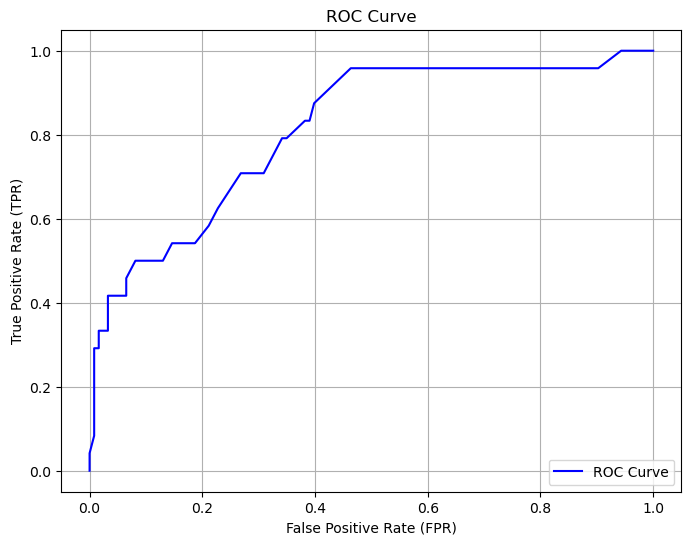

In [24]:
import matplotlib.pyplot as plt

# Generate the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_at_t, tpr_at_t, label='ROC Curve', color='blue')

# Add labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()


### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


MAX ACC:  0.8775510204081632
MAX F1:  0.5


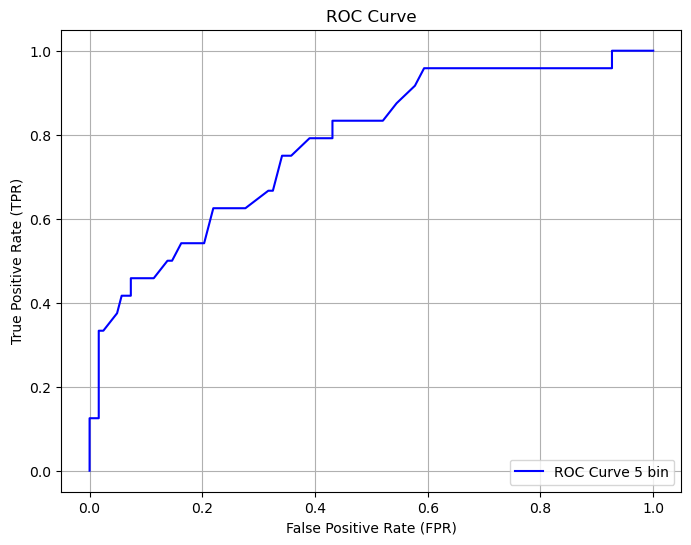

In [30]:
model.fit_params(x_train,y_train, n_bins=5)


accuracy_at_t = np.zeros_like(thresholds)
tpr_at_t = np.zeros_like(thresholds)
fpr_at_t = np.zeros_like(thresholds)
f1_at_t = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    y_hist_5_pred = model.predict(x_test,thresh=thresholds[i])
    accuracy, _, recall, F1, fpr, _, _ = evaluate(y_test, y_hist_5_pred,show_result=False)
    accuracy_at_t[i] = accuracy
    tpr_at_t[i] = recall
    fpr_at_t[i] = fpr
    f1_at_t[i] = F1
    # print("---------------")

max_accuracy_index = np.argmax(accuracy_at_t)
max_f1_index = np.argmax(f1_at_t)

print("MAX ACC: ", accuracy_at_t[max_accuracy_index])
print("MAX F1: ", f1_at_t[max_f1_index])

import matplotlib.pyplot as plt

# Generate the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_at_t, tpr_at_t, label='ROC Curve 5 bin', color='blue')

# Add labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()
